# EDA com Dask
fonte: https://stackoverflow.com/a/48407838

https://www.kaggle.com/h4pzzz/eda-using-dask

Algumas funções do Dask vão exigir a definição do `dtypes` no `read_csv`.

O uso do Dask é devido ao tamanho do dataset que é imenso, ~5GB. Técnicas como skiprow com o Pandas não funcionaram por problemas de memória.

Nas próximas linhas o que acontece é após ler o arquivo .csv, criamos um sample com `frac=0.01` (o dataset original tem mais de 11 milhões de observações (linhas) - 0.01 nos retorna em torno de 111 mil).

Com o sample podemos tirar algumas estatísticas para entender os dados. Não conseguimos usar o `sample.describe().compute().T`, pois gera um erro `No non-trivial arrays found`. Por causa disso, nós pegamos um Pandas dataframe do sample com `sample.compute()` e passamos para a biblioteca `pandas_profiling`.

In [2]:
import dask.dataframe as dd

inep_curso_superior_2016_data_frame = dd.read_csv('DM_ALUNO.CSV', delimiter='|', encoding='ISO-8859-1', dtype={'CO_GRAU_ACADEMICO': 'float64',
       'CO_OCDE_AREA_DETALHADA': 'float64',
       'CO_OCDE_AREA_ESPECIFICA': 'float64',
       'CO_OCDE_AREA_GERAL': 'float64',
       'CO_TURNO_ALUNO': 'float64',
       'IN_ING_CONVENIO_PECG': 'float64'})

In [2]:
inep_curso_superior_2016_data_frame.describe()

,CO_IES,CO_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,CO_TURNO_ALUNO,CO_GRAU_ACADEMICO,CO_MODALIDADE_ENSINO,CO_NIVEL_ACADEMICO,CO_OCDE_AREA_GERAL,CO_OCDE_AREA_ESPECIFICA,CO_OCDE_AREA_DETALHADA,CO_ALUNO_CURSO,CO_ALUNO_CURSO_ORIGEM,CO_ALUNO,CO_COR_RACA_ALUNO,IN_SEXO_ALUNO,NU_ANO_ALUNO_NASC,NU_MES_ALUNO_NASC,NU_DIA_ALUNO_NASC,NU_IDADE_ALUNO,CO_NACIONALIDADE_ALUNO,CO_PAIS_ORIGEM_ALUNO,CO_UF_NASCIMENTO,CO_MUNICIPIO_NASCIMENTO,IN_ALUNO_DEF_TGD_SUPER,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_DEF_MULTIPLA,IN_DEF_SURDEZ,IN_DEF_SURDOCEGUEIRA,IN_DEF_BAIXA_VISAO,IN_DEF_CEGUEIRA,IN_DEF_SUPERDOTACAO,IN_TGD_AUTISMO_INFANTIL,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,CO_ALUNO_SITUACAO,QT_CARGA_HORARIA_TOTAL,QT_CARGA_HORARIA_INTEG,IN_ING_VESTIBULAR,IN_ING_ENEM,IN_ING_AVALIACAO_SERIADA,IN_ING_SELECAO_SIMPLIFICADA,IN_ING_SELECAO_VAGA_REMANESC,IN_ING_SELECAO_VAGA_PROG_ESPEC,IN_ING_TRANSF_EXOFFICIO,IN_ING_DECISAO_JUDICIAL,IN_ING_CONVENIO_PECG,IN_RESERVA_VAGAS,IN_RESERVA_ETNICO,IN_RESERVA_DEFICIENCIA,IN_RESERVA_ENSINO_PUBLICO,IN_RESERVA_RENDA_FAMILIAR,IN_RESERVA_OUTRA,IN_FINANC_ESTUDANTIL,IN_FIN_REEMB_FIES,IN_FIN_REEMB_ESTADUAL,IN_FIN_REEMB_MUNICIPAL,IN_FIN_REEMB_PROG_IES,IN_FIN_REEMB_ENT_EXTERNA,IN_FIN_REEMB_OUTRA,IN_FIN_NAOREEMB_PROUNI_INTEGR,IN_FIN_NAOREEMB_PROUNI_PARCIAL,IN_FIN_NAOREEMB_ESTADUAL,IN_FIN_NAOREEMB_MUNICIPAL,IN_FIN_NAOREEMB_PROG_IES,IN_FIN_NAOREEMB_ENT_EXTERNA,IN_FIN_NAOREEMB_OUTRA,IN_APOIO_SOCIAL,IN_APOIO_ALIMENTACAO,IN_APOIO_BOLSA_PERMANENCIA,IN_APOIO_BOLSA_TRABALHO,IN_APOIO_MATERIAL_DIDATICO,IN_APOIO_MORADIA,IN_APOIO_TRANSPORTE,IN_ATIVIDADE_EXTRACURRICULAR,IN_COMPL_ESTAGIO,IN_COMPL_EXTENSAO,IN_COMPL_MONITORIA,IN_COMPL_PESQUISA,IN_BOLSA_ESTAGIO,IN_BOLSA_EXTENSAO,IN_BOLSA_MONITORIA,IN_BOLSA_PESQUISA,CO_TIPO_ESCOLA_ENS_MEDIO,IN_ALUNO_PARFOR,CO_SEMESTRE_CONCLUSAO,CO_SEMESTRE_REFERENCIA,IN_MOBILIDADE_ACADEMICA,CO_MOBILIDADE_ACADEMICA,CO_MOBILIDADE_ACADEMICA_INTERN,CO_IES_DESTINO,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,ANO_INGRESSO
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,int64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [3]:
inep_curso_superior_2016_data_frame.dtypes

CO_IES                              int64
NO_IES                             object
CO_CATEGORIA_ADMINISTRATIVA         int64
DS_CATEGORIA_ADMINISTRATIVA        object
CO_ORGANIZACAO_ACADEMICA            int64
DS_ORGANIZACAO_ACADEMICA           object
CO_CURSO                            int64
NO_CURSO                           object
CO_CURSO_POLO                     float64
CO_TURNO_ALUNO                    float64
DS_TURNO_ALUNO                     object
CO_GRAU_ACADEMICO                 float64
DS_GRAU_ACADEMICO                  object
CO_MODALIDADE_ENSINO                int64
DS_MODALIDADE_ENSINO               object
CO_NIVEL_ACADEMICO                  int64
DS_NIVEL_ACADEMICO                 object
CO_OCDE                            object
NO_OCDE                            object
CO_OCDE_AREA_GERAL                float64
NO_OCDE_AREA_GERAL                 object
CO_OCDE_AREA_ESPECIFICA           float64
NO_OCDE_AREA_ESPECIFICA            object
CO_OCDE_AREA_DETALHADA            

## Criando sample do dataset original
fonte:https://nikgrozev.com/2015/06/16/fast-and-simple-sampling-in-pandas-when-loading-data-from-files/

Como o dataset original é muito grande, usamos o sample para ter uma fração do dataset gerado randomicamente.

Criamos um sample com frac=0.01 (o dataset original tem mais de 11 milhões de observações (linhas) - 0.01 nos retorna em torno de 111 mil).

In [3]:
sample = inep_curso_superior_2016_data_frame.sample(frac=0.01)

In [5]:
sample.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 119 entries, CO_IES to ANO_INGRESSO
dtypes: object(18), float64(63), int64(38)

In [3]:
#quantas observações temos no sample
len(sample)

/opt/conda/lib/python3.6/site-packages/dask/local.py:272: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, data)


114491

In [ ]:
#quantas observações temos no dataset original
len(inep_curso_superior_2016_data_frame)

In [ ]:
sample.CO_COR_RACA_ALUNO

In [ ]:
#quantas observações da variável CO_COR_RACA_ALUNO estão vazias
sample.CO_COR_RACA_ALUNO.isnull().sum().compute()

In [ ]:
sample.head()

In [9]:
sample.DS_COR_RACA_ALUNO.values.compute()

/opt/conda/lib/python3.6/site-packages/dask/local.py:252: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]


array(['Parda', 'Branca', 'Parda', ..., 'Branca', 'Branca', 'Branca'], dtype=object)

In [ ]:
#não funciona
sample.describe().compute().T

## Data profiling
nós pegamos um Pandas dataframe do sample com sample.compute() e passamos para a biblioteca pandas_profiling.

https://datascienceplus.com/correlation-and-linear-regression/

In [5]:
!pip install pandas_profiling

import pandas_profiling
pandas_profiling.ProfileReport(sample.compute())

You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/opt/conda/lib/python3.6/site-packages/dask/local.py:272: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, data)


Number of variables,120
Number of observations,114491
Total Missing (%),40.5%
Total size in memory,104.8 MiB
Average record size in memory,960.0 B
Numeric,77
Categorical,17
Boolean,19
Date,0
Text (Unique),0
Rejected,6


## Variaveis

IN_APOIO_ALIMENTACAO

CO_COR_RACA_ALUNO

DS_COR_RACA_ALUNO

IN_APOIO_BOLSA_PERMANENCIA

IN_FINANC_ESTUDANTIL

IN_FIN_REEMB_FIES

IN_FIN_NAOREEMB_PROUNI_INTEGR

IN_FIN_NAOREEMB_PROUNI_PARCIAL

IN_RESERVA_ETNICO

IN_RESERVA_RENDA_FAMILIAR

CO_TIPO_ESCOLA_ENS_MEDIO


**Outras variáveis para ver depois**

IN_APOIO_* variaveis: qual a relação de cor e apoio?

/opt/conda/lib/python3.6/site-packages/dask/local.py:272: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, data)
/opt/conda/lib/python3.6/site-packages/dask/local.py:272: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, data)
/opt/conda/lib/python3.6/site-packages/dask/local.py:272: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, data)


Text(0.5,1,'2016 - Pessoas na universidade por raça')

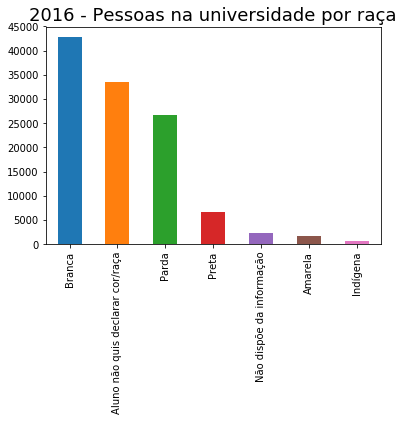

In [10]:
import matplotlib.pyplot as plt

ax = sample.DS_COR_RACA_ALUNO.value_counts().compute().plot(kind='bar')
ax.set_title("2016 - Pessoas na universidade por raça", fontsize=18)

In [8]:
sample[['DS_COR_RACA_ALUNO', 'IN_RESERVA_ETNICO']].compute()

/opt/conda/lib/python3.6/site-packages/dask/local.py:272: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, data)


,DS_COR_RACA_ALUNO,IN_RESERVA_ETNICO
30877,Branca,NaN
34784,Branca,0.0
8685,Branca,NaN
52655,Branca,NaN
14829,Parda,NaN
40602,Branca,NaN
47655,Preta,1.0
49432,Branca,NaN
40221,Preta,1.0
33326,Parda,NaN


In [9]:
sample[['DS_COR_RACA_ALUNO', 'IN_RESERVA_ETNICO']].query('IN_RESERVA_ETNICO == 1.0').compute()

/opt/conda/lib/python3.6/site-packages/dask/local.py:272: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, data)


,DS_COR_RACA_ALUNO,IN_RESERVA_ETNICO
47655,Preta,1.0
40221,Preta,1.0
42474,Preta,1.0
48003,Aluno não quis declarar cor/raça,1.0
70023,Parda,1.0
34206,Preta,1.0
22047,Parda,1.0
34879,Parda,1.0
44331,Preta,1.0
62310,Parda,1.0
